### Import Provider of Services file
Separate notebook due to large size of POS 

In [45]:
import pandas as pd
import pickle

In [46]:
pos = pd.read_csv('POS_OTHER_DEC17.csv',dtype=object)
pos.shape

(144110, 473)

In [47]:
with open('hosp.pickle','rb') as read_file:
    hosp = pickle.load(read_file)

In [48]:
for col in pos.columns:
    print(col)

PRVDR_CTGRY_SBTYP_CD
PRVDR_CTGRY_CD
CHOW_CNT
CHOW_DT
CITY_NAME
ACPTBL_POC_SW
CMPLNC_STUS_CD
SSA_CNTY_CD
CROSS_REF_PROVIDER_NUMBER
CRTFCTN_DT
ELGBLTY_SW
FAC_NAME
INTRMDRY_CARR_CD
MDCD_VNDR_NUM
ORGNL_PRTCPTN_DT
CHOW_PRIOR_DT
INTRMDRY_CARR_PRIOR_CD
PRVDR_NUM
RGN_CD
SKLTN_REC_SW
STATE_CD
SSA_STATE_CD
STATE_RGN_CD
ST_ADR
PHNE_NUM
PGM_TRMNTN_CD
TRMNTN_EXPRTN_DT
CRTFCTN_ACTN_TYPE_CD
GNRL_CNTL_TYPE_CD
ZIP_CD
FIPS_STATE_CD
FIPS_CNTY_CD
CBSA_URBN_RRL_IND
CBSA_CD
ACRDTN_EFCTV_DT
ACRDTN_EXPRTN_DT
ACRDTN_TYPE_CD
TOT_AFLTD_AMBLNC_SRVC_CNT
TOT_AFLTD_ASC_CNT
TOT_COLCTD_HOSP_CNT
TOT_AFLTD_ESRD_CNT
TOT_AFLTD_FQHC_CNT
TOT_AFLTD_HHA_CNT
TOT_AFLTD_HOSPC_CNT
TOT_AFLTD_OPO_CNT
TOT_AFLTD_PRTF_CNT
TOT_AFLTD_RHC_CNT
TOT_AFLTD_SNF_CNT
AFLTD_PRVDR_CNT
RSDNT_PGM_ALPTHC_SW
RSDNT_PGM_DNTL_SW
RSDNT_PGM_OSTPTHC_SW
RSDNT_PGM_OTHR_SW
RSDNT_PGM_PDTRC_SW
LAB_SRVC_CD
PHRMCY_SRVC_CD
RDLGY_SRVC_CD
ASC_BGN_SRVC_DT
FREESTNDNG_ASC_SW
OVRRD_BED_CNT_SW
CRTFD_BED_CNT
ICFIID_BED_CNT
MDCD_NF_BED_CNT
MDCR_SNF_BED_CNT
MDCR_MDCD_SNF_BE

In [49]:
pos['PRVDR_NUM'].value_counts()

45F540    1
335304    1
165523    1
262505    1
16E405    1
         ..
52A413    1
056745    1
312334    1
045364    1
671585    1
Name: PRVDR_NUM, Length: 144110, dtype: int64

In [50]:
hosp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2320 entries, 0 to 3112
Data columns (total 43 columns):
provider_id                                                                          2320 non-null object
start_date                                                                           2320 non-null object
end_date                                                                             2320 non-null object
avg_EXCESS                                                                           2320 non-null float64
avg_PRR                                                                              2320 non-null float64
avg_ERR                                                                              2320 non-null float64
PRR_imputed                                                                          2320 non-null int64
nod_imputed                                                                          2320 non-null int64
number_of_discharges                        

In [51]:
pos2 = pos.merge(hosp,right_on='provider_id',left_on='PRVDR_NUM',how='inner')

In [52]:
pos2.shape

(2320, 516)

In [53]:
pos2 = pos2.loc[:,['provider_id','CRTFD_BED_CNT']]
pos2['CRTFD_BED_CNT'] = pos2['CRTFD_BED_CNT'].astype(int)

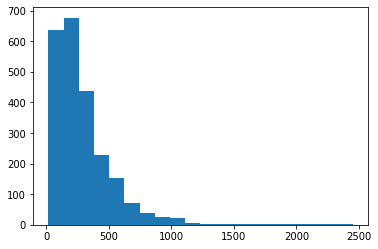

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(pos2['CRTFD_BED_CNT'],bins=20);

In [55]:
hosp2 = hosp.merge(pos2,on='provider_id')

In [56]:
hosp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2378 entries, 0 to 2377
Data columns (total 44 columns):
provider_id                                                                          2378 non-null object
start_date                                                                           2378 non-null object
end_date                                                                             2378 non-null object
avg_EXCESS                                                                           2378 non-null float64
avg_PRR                                                                              2378 non-null float64
avg_ERR                                                                              2378 non-null float64
PRR_imputed                                                                          2378 non-null int64
nod_imputed                                                                          2378 non-null int64
number_of_discharges                        

In [57]:
with open('hosp2.pickle', 'wb') as to_write:
    pickle.dump(hosp2, to_write)